In [1]:
import torch
from torch import nn,optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
torch.manual_seed(666)

# Hyper Parameters
TIME_STEP = 10
INPUT_SIZE = 1 
LR = 0.02

In [3]:
# Generate data
steps = np.linspace(0,np.pi*2,100,dtype=np.float32)  # float32 for convert to torch.FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)

plt.plot(steps,x_np,'b-',label='input (sin)')
plt.plot(steps,y_np,'r-',label='target (cos)')
plt.legend(loc='best')
plt.show()

In [4]:
class RNN(nn.Module):
    
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )
        
        self.fc = nn.Linear(32,1)
        
    def forward(self,x,h_prev):
        # x (batch, time_step, input_size)
        # h_prev (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out,h_prev = self.rnn(x,h_prev)
        
        r_out = r_out.view(-1,32)
        outs = self.fc(r_out)
        outs = outs.view(-1,TIME_STEP,1)
        
        return outs, h_prev

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


Exception in Tkinter callback
Traceback (most recent call last):
  File "d:\anaconda3\envs\pytorch\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "d:\anaconda3\envs\pytorch\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "d:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "d:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "d:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "d:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002CF0E225D30>
Exception in Tkinter callback
T

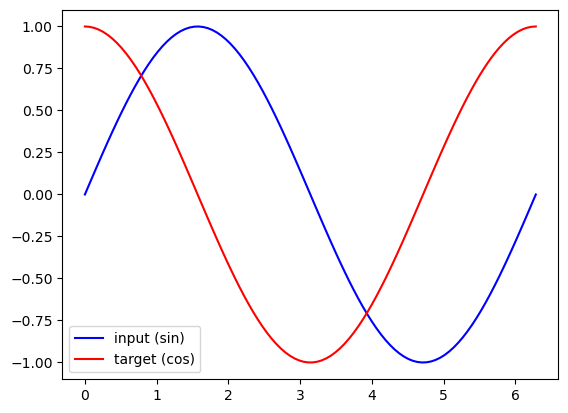

In [5]:
rnn = RNN()
print(rnn)

optimizer = optim.Adam(rnn.parameters(),lr=LR)
criterion = nn.MSELoss()

h_state = None  # for initial hidden state

plt.figure(1,figsize=(12,5))
plt.ion()

In [6]:
for step in range(10):
    start,end = step * np.pi, (step+1)*np.pi 
    # using sin predict cos
    steps = np.linspace(start,end,TIME_STEP,dtype=np.float32,endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis])  # shape [batch,time_step,input_size]
    y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis])
    
    prediction, h_state = rnn(x,h_state)
    # next step
    h_state = h_state.data  # repack the hidden state, break the connection from last iteration
    
    loss = criterion(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)
 
plt.ioff()